# Joyplots

In [2]:

import sys

!{sys.executable} -m pip install joypy

In [3]:

# From https://raw.githubusercontent.com/sbebo/joypy/master/Joyplot.ipynb
import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm

## Obligatory iris stuff

Though not a great fit for this kind of visualization, we can generate some joyplots with the `iris` dataset.

In [4]:
# %load ../../load_magic/storage.py

!mkdir ..\data
!mkdir ..\data\csv
!mkdir ..\saves
!mkdir ..\saves\pickle
!mkdir ..\saves\csv
import pickle
import pandas as pd
import os

# Handy list of the different types of encodings
encoding = ['latin1', 'iso8859-1', 'utf-8'][2]

# Change this to your data and saves folders
data_folder = r'../data/'
saves_folder = r'../saves/'

def load_csv(csv_name=None, folder_path=None):
    if folder_path is None:
        csv_folder = data_folder + 'csv/'
    else:
        csv_folder = folder_path + 'csv/'
    if csv_name is None:
        csv_path = max([os.path.join(csv_folder, f) for f in os.listdir(csv_folder)],
                       key=os.path.getmtime)
    else:
        csv_path = csv_folder + csv_name + '.csv'
    data_frame = pd.read_csv(csv_path, encoding=encoding)
    
    return(data_frame)

def load_dataframes(**kwargs):
    frame_dict = {}
    for frame_name in kwargs:
        pickle_path = saves_folder + 'pickle/' + frame_name + '.pickle'
        if not os.path.isfile(pickle_path):
            csv_folder = saves_folder + 'csv/'
            csv_path = csv_folder + frame_name + '.csv'
            if not os.path.isfile(csv_path):
                csv_path = data_folder + 'csv/' + frame_name + '.csv'
                if not os.path.isfile(csv_path):
                    frame_dict[frame_name] = None
                else:
                    frame_dict[frame_name] = load_csv(csv_name=frame_name)
            else:
                frame_dict[frame_name] = load_csv(csv_name=frame_name, folder_path=csv_folder)
        else:
            frame_dict[frame_name] = load_object(frame_name)
    
    return frame_dict

def load_object(obj_name, download_url=None):
    pickle_path = saves_folder + 'pickle/' + obj_name + '.pickle'
    if not os.path.isfile(pickle_path):
        csv_path = data_folder + 'csv/' + obj_name + '.csv'
        if not os.path.isfile(csv_path):
            object = pd.read_csv(download_url, low_memory=False,
                                 encoding=encoding)
        else:
            object = pd.read_csv(csv_path, low_memory=False,
                                 encoding=encoding)
        if isinstance(object, pd.DataFrame):
            object.to_pickle(pickle_path)
        else:
            with open(pickle_path, 'wb') as handle:
                pickle.dump(object, handle, pickle.HIGHEST_PROTOCOL)
    else:
        try:
            object = pd.read_pickle(pickle_path)
        except:
            with open(pickle_path, 'rb') as handle:
                object = pickle.load(handle)
    
    return(object)

def save_dataframes(include_index=False, **kwargs):
    csv_folder = saves_folder + 'csv/'
    for frame_name in kwargs:
        if isinstance(kwargs[frame_name], pd.DataFrame):
            csv_path = csv_folder + frame_name + '.csv'
            kwargs[frame_name].to_csv(csv_path, sep=',', encoding=encoding,
                                      index=include_index)

# Classes, functions, and methods cannot be pickled
def store_objects(**kwargs):
    for obj_name in kwargs:
        if hasattr(kwargs[obj_name], '__call__'):
            raise RuntimeError('Functions cannot be pickled.')
        obj_path = saves_folder + 'pickle/' + str(obj_name)
        pickle_path = obj_path + '.pickle'
        if isinstance(kwargs[obj_name], pd.DataFrame):
            kwargs[obj_name].to_pickle(pickle_path)
        else:
            with open(pickle_path, 'wb') as handle:
                pickle.dump(kwargs[obj_name], handle, pickle.HIGHEST_PROTOCOL)

In [5]:

download_url = 'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
iris_df = load_object('iris', download_url=download_url)

In [6]:

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


By default, `joypy.joyplot()` will draw joyplot with a density subplot for each numeric column in the dataframe.
The density is obtained with the `gaussian_kde` function of `scipy`.

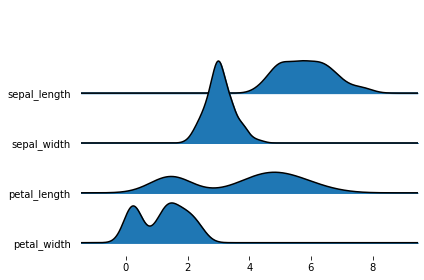

In [7]:

%matplotlib inline
fig, axes = joypy.joyplot(iris_df)

If you pass a grouped dataframe, or if you pass a column name to the `by` argument, you get a density plot
for each value in the grouped column.

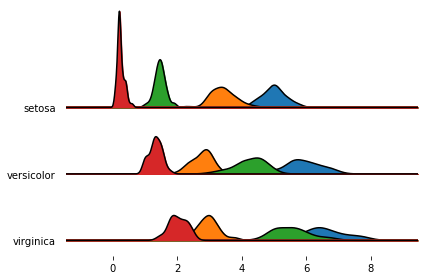

In [8]:

%matplotlib inline
fig, axes = joypy.joyplot(iris_df, by='species')

In the previous plot, one subplot had a much larger `y` extensions than the others.
Since, by default, the subplots share the `y`-limits, the outlier causes all the other subplots to be quite
compressed.

We can change this behavior letting each subplot take up the whole `y` space with `ylim='own'`, as follows.

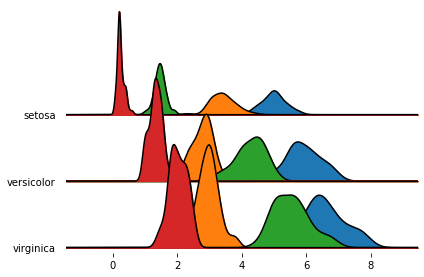

In [9]:

%matplotlib inline
fig, axes = joypy.joyplot(iris_df, by='species', ylim='own')

In this case, we achieved more overlap, but the subplots are no longer directly comparable.

Yet another option is to keep the default ylim behavior (i.e., `ylim='max'`),
and simply increase the overlap factor:

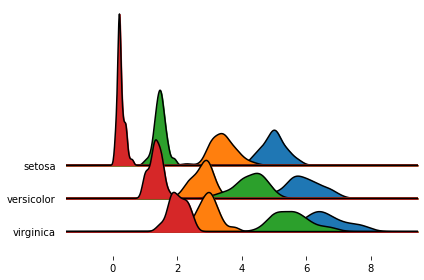

In [10]:

%matplotlib inline
fig, axes = joypy.joyplot(iris_df, by='species', overlap=3)

It's also possible to draw histograms with `hist=True`, though they don't look nice when overlapping, 
so it's better to set `overlap=0`.

With `grid=True` or `grid='both'` you also get grid lines on both axis.

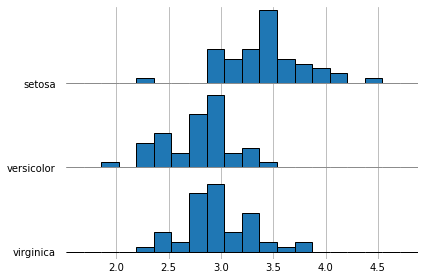

In [11]:

%matplotlib inline
fig, axes = joypy.joyplot(iris_df, by='species', column='sepal_width',
                          hist=True, bins=20, overlap=0,
                          grid=True, legend=False)

## Global daily temperatures

Something that is probably a better fit for joyplots than `iris`: let's visualize the distribution of
global daily temperatures from 1880 to 2014.

(The original file can be found [here](http://berkeleyearth.org/data/))

In [18]:

%matplotlib inline

#temp_df = load_object('daily_temp')
temp_df = pd.read_csv('../data/csv/daily_temp.csv', comment='%')
temp_df.head()

,Date Number,Year,Month,Day,Day of Year,Anomaly
0,1880.001,1880,1,1,1,-0.808
1,1880.004,1880,1,2,2,-0.670
2,1880.007,1880,1,3,3,-0.740
3,1880.010,1880,1,4,4,-0.705
4,1880.012,1880,1,5,5,-0.752


The column `Anomaly` contains the global daily temperature (in °C) computed as the difference between the
daily value and the 1950-1980 global average.
We can draw the distribution of the temperatures in time, grouping by `Year`, to see
how the daily temperature distribution shifted across time.

Since the `y` label would get pretty crammed if we were to show all the year labels, we first prepare
a list where we leave only the multiples of 10.

To reduce the clutter, the option `range_style='own'` limits 
the `x` range of each individual density plot to the range where the density is non-zero
(+ an "aestethic" tolerance to avoid cutting the tails too early/abruptly),
rather than spanning the whole `x` axis.

The option `colormap=cm.autumn_r` provides a colormap to use along the plot.

(Grouping the dataframe and computing the density plots can take a few seconds here.)

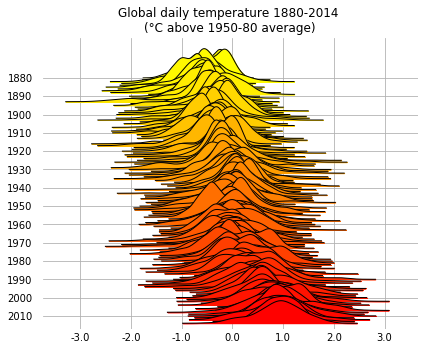

In [19]:

%matplotlib inline

labels = [y if y%10==0 else None for y in list(temp_df.Year.unique())]
fig, axes = joypy.joyplot(temp_df, by='Year', column='Anomaly', labels=labels, range_style='own', 
                          grid=True, linewidth=1, legend=False, figsize=(6,5),
                          title='Global daily temperature 1880-2014 \n(°C above 1950-80 average)',
                          colormap=cm.autumn_r)

If you want, you can also plot the raw counts, rather than the estimated density. 
This makes for noisier plots, but it might be preferable in some cases.

With `fade=True`, the subplots get a progressively larger alpha value.

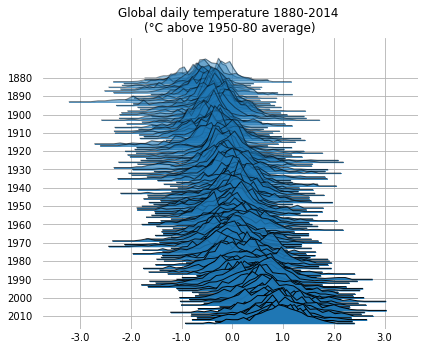

In [20]:

%matplotlib inline

labels=[y if y%10==0 else None for y in list(temp_df.Year.unique())]
fig, axes = joypy.joyplot(temp_df, by='Year', column='Anomaly', labels=labels, range_style='own', 
                          grid=True, linewidth=1, legend=False, fade=True, figsize=(6,5),
                          title='Global daily temperature 1880-2014 \n(°C above 1950-80 average)',
                          kind='counts', bins=30)

Just for fun, let's plot the same data as it were on the cover of Unknown Pleasures,
the Joy Division's album where the nickname to this kind of visualization comes from.

No labels/grids, no filling, black background, white lines, and a couple of adjustments just to make it look a bit more like the album cover. 

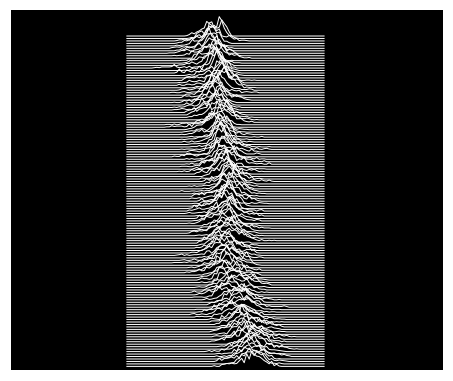

In [21]:

%matplotlib inline

fig, axes = joypy.joyplot(temp_df, by='Year', column='Anomaly', ylabels=False, xlabels=False, 
                          grid=False, fill=False, background='k', linecolor='w', linewidth=1,
                          legend=False, overlap=0.5, figsize=(6,5), kind='counts', bins=80)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
for a in axes[:-1]:
    a.set_xlim([-8,8])      

## NBA players - regular season stats

The files can be obtained from [Kaggle datasets](https://www.kaggle.com/drgilermo/nba-players-stats).

In [12]:
players = pd.read_csv("data/Players.csv",index_col=0)
players.head()

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [13]:
seasons = pd.read_csv("data/Seasons_Stats.csv", index_col=0)
seasons.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


Join the dataframes and filter:
- years starting from the 3 point line introduction (1979-80)
- player seasons with at least 10 field goal attempts.

In [14]:
joined = seasons.merge(players, on="Player")
threepoints = joined[(joined.Year > 1979) & (joined["FGA"] > 10)].sort_values("Year")
threepoints["3Pfract"] = threepoints["3PA"]/threepoints.FGA

The fraction of 3 pointers attempted by each player in a season has clearly shifted a lot.  
In today's NBA there's a good number of players who take 40% or more of their shots from behind the line.

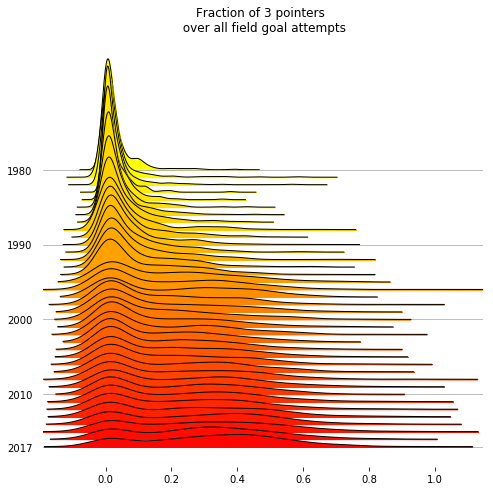

In [15]:
%matplotlib inline

decades = [int(y) if y%10==0 or y == 2017 else None for y in threepoints.Year.unique()]
fig, axes = joypy.joyplot(threepoints, by="Year", column="3Pfract",
                  kind="kde", 
                  range_style='own', tails=0.2, 
                  overlap=3, linewidth=1, colormap=cm.autumn_r,
                  labels=decades, grid='y', figsize=(7,7), 
                  title="Fraction of 3 pointers \n over all field goal attempts")#, x_range=[-0.05,1])

In this last plot, the distributions of the 3P percentages across the players
are drawn as raw binned counts. 

With `kind=normalized_counts`, the values are normalized
over the occurrences in each year: this is probably needed here, because that the number of teams and players
in the NBA has grown during the years.

The median NBA player has become a much better 3P shooter.

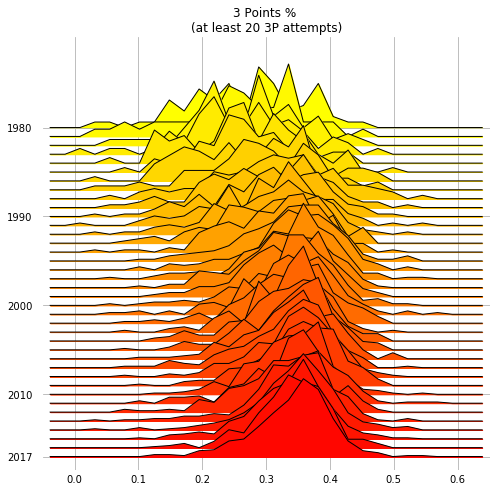

In [16]:
%matplotlib inline

threepoint_shooters = threepoints[threepoints["3PA"] >= 20] 
decades = [int(y) if y%10==0 or y == 2017 else None for y in threepoint_shooters.Year.unique()]
fig, axes = joypy.joyplot(threepoint_shooters, by="Year", column="3P%",
                   kind="normalized_counts", bins=30, 
                   range_style='all', x_range=[-0.05,0.65],
                   overlap=2, linewidth=1, colormap=cm.autumn_r,
                   labels=decades, grid='both', figsize=(7,7),
                   title="3 Points % \n(at least 20 3P attempts)")